## Сети прямого распространения

In [63]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from torch import optim
import torchvision.transforms as transforms
import torch.nn as nn

In [64]:
train_dataset = torchvision.datasets.CIFAR10(root='data/',
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=True)


Files already downloaded and verified


In [65]:
image, label = train_dataset[1]
print(image.size())
print(label)

torch.Size([3, 32, 32])
9


In [66]:
image.permute(1, 2, 0).shape

torch.Size([32, 32, 3])

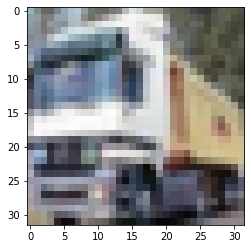

In [67]:
plt.imshow(image.permute(1, 2, 0).numpy());

Создадим загрузчик (генератор пакетов):

In [68]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

Повторим для тестовых данных:

In [69]:
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                            download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=8,
                                          shuffle=False)

Files already downloaded and verified


Список классов:

In [70]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

нейронка:

In [71]:
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 8 * hidden_dim)
        self.fc2 = nn.Linear(8 * hidden_dim, 4 * hidden_dim)
        self.fc3 = nn.Linear(4 * hidden_dim, 2 * hidden_dim)
        self.fc4 = nn.Linear(2 * hidden_dim, hidden_dim)
        self.fc5 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.fc4(x)
        x = F.leaky_relu(x)
        x = self.fc5(x)
        return x
    
    def predict(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.fc4(x)
        x = F.leaky_relu(x)
        x = self.fc5(x)
        x = F.softmax(x)
        return x


net = Net(3072, 100, 10)
net.train()

Net(
  (fc1): Linear(in_features=3072, out_features=800, bias=True)
  (fc2): Linear(in_features=800, out_features=400, bias=True)
  (fc3): Linear(in_features=400, out_features=200, bias=True)
  (fc4): Linear(in_features=200, out_features=100, bias=True)
  (fc5): Linear(in_features=100, out_features=10, bias=True)
)

In [72]:
3 * 32 * 32

3072

Потери и оптимизатор:

In [73]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.5)

цикл обучения:

In [74]:
num_epochs = 10

for epoch in range(num_epochs):
    running_loss = 0.0
    running_items = 0.0


    for i, data in enumerate(train_loader):
        inputs, labels = data[0], data[1]

         # Обнуляем градиент
        optimizer.zero_grad()
        # Делаем предсказание
        outputs = net(inputs)
        # Рассчитываем лосс-функцию
        loss = criterion(outputs, labels)
        # Делаем шаг назад по лоссу
        loss.backward()
        # Делаем шаг нашего оптимайзера
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        running_items += len(labels)
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print(f'Epoch [{epoch + 1}/{num_epochs}]. ' \
                  f'Step [{i + 1}/{len(train_loader)}]. ' \
                  f'Loss: {running_loss / running_items:.3f}')
            running_loss, running_items = 0.0, 0.0

print('Training is finished!')

Epoch [1/10]. Step [1/782]. Loss: 0.036
Epoch [1/10]. Step [301/782]. Loss: 0.036
Epoch [1/10]. Step [601/782]. Loss: 0.036
Epoch [2/10]. Step [1/782]. Loss: 0.034
Epoch [2/10]. Step [301/782]. Loss: 0.032
Epoch [2/10]. Step [601/782]. Loss: 0.031
Epoch [3/10]. Step [1/782]. Loss: 0.029
Epoch [3/10]. Step [301/782]. Loss: 0.030
Epoch [3/10]. Step [601/782]. Loss: 0.029
Epoch [4/10]. Step [1/782]. Loss: 0.031
Epoch [4/10]. Step [301/782]. Loss: 0.028
Epoch [4/10]. Step [601/782]. Loss: 0.028
Epoch [5/10]. Step [1/782]. Loss: 0.026
Epoch [5/10]. Step [301/782]. Loss: 0.027
Epoch [5/10]. Step [601/782]. Loss: 0.027
Epoch [6/10]. Step [1/782]. Loss: 0.027
Epoch [6/10]. Step [301/782]. Loss: 0.026
Epoch [6/10]. Step [601/782]. Loss: 0.026
Epoch [7/10]. Step [1/782]. Loss: 0.026
Epoch [7/10]. Step [301/782]. Loss: 0.025
Epoch [7/10]. Step [601/782]. Loss: 0.025
Epoch [8/10]. Step [1/782]. Loss: 0.027
Epoch [8/10]. Step [301/782]. Loss: 0.024
Epoch [8/10]. Step [601/782]. Loss: 0.024
Epoch [9

## Загрузка и сохранение модели

### Сохранение модели

In [75]:
PATH_WEIGHTS = './cifar_net_test_version_weights.pth'
torch.save(net.state_dict(), PATH_WEIGHTS)

In [76]:
print("Model state_dict: ")
for param in net.state_dict():
    print(param, "\t", net.state_dict()[param].size())

Model state_dict: 
fc1.weight 	 torch.Size([800, 3072])
fc1.bias 	 torch.Size([800])
fc2.weight 	 torch.Size([400, 800])
fc2.bias 	 torch.Size([400])
fc3.weight 	 torch.Size([200, 400])
fc3.bias 	 torch.Size([200])
fc4.weight 	 torch.Size([100, 200])
fc4.bias 	 torch.Size([100])
fc5.weight 	 torch.Size([10, 100])
fc5.bias 	 torch.Size([10])


In [77]:
PATH_MODEL = './cifar_net_test_version_model.pth'
torch.save(net, PATH_MODEL)

### Загрузка и использование модели 

In [78]:
net = Net(3072, 100, 10)
net.load_state_dict(torch.load(PATH_WEIGHTS))
net

Net(
  (fc1): Linear(in_features=3072, out_features=800, bias=True)
  (fc2): Linear(in_features=800, out_features=400, bias=True)
  (fc3): Linear(in_features=400, out_features=200, bias=True)
  (fc4): Linear(in_features=200, out_features=100, bias=True)
  (fc5): Linear(in_features=100, out_features=10, bias=True)
)

In [79]:
net = torch.load(PATH_MODEL)

In [80]:
data_iter = iter(test_loader)
images, labels = next(data_iter)

GroundTruth:  cat ship ship plane frog frog car frog


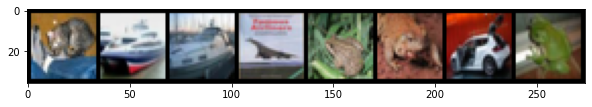

In [81]:
net.eval()
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.figure(figsize=(10, 5))
plt.imshow(imgs.permute(1, 2, 0).numpy())
print('GroundTruth: ', ' '.join(classes[labels[j]] for j in range(len(labels))))

In [82]:
print(outputs)

tensor([[ 0.5380,  0.6978,  0.3815,  1.1373, -0.5303,  0.5336,  0.6725, -2.9123,
          0.7952, -1.3996],
        [ 1.8025,  4.4062, -2.5568, -1.5081, -2.3023, -2.7764, -3.5067, -3.3086,
          4.1903,  3.8994],
        [ 2.7207,  3.2026, -1.5147, -1.6477, -1.4853, -2.4111, -4.1114, -3.0436,
          4.4162,  1.9058],
        [ 2.0752,  1.3120,  0.0151, -0.8081, -0.6106, -1.1364, -2.5992, -2.0784,
          2.6409, -0.1518],
        [-0.3145, -1.3212,  1.1984,  0.3016,  2.2349,  0.2093,  2.3552, -1.5029,
         -0.4999, -2.3638],
        [-0.9547, -0.1958,  0.5352,  1.4044, -0.0154,  0.9954,  2.1455, -0.8129,
         -2.3261, -0.5894],
        [-0.1732,  2.9577, -0.7963,  1.5412, -2.5451,  1.1522, -0.7896, -1.8584,
         -0.8332,  0.6674],
        [-0.5470, -1.5385,  1.7288,  0.4196,  1.8755,  0.3443,  2.3503, -0.4491,
         -1.6870, -2.0101]], grad_fn=<AddmmBackward0>)


In [83]:
net.predict(images)

/tmp/ipykernel_16785/2910908592.py:37: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([[1.1362e-01, 1.3331e-01, 9.7155e-02, 2.0689e-01, 3.9036e-02, 1.1311e-01,
         1.2997e-01, 3.6056e-03, 1.4694e-01, 1.6366e-02],
        [2.9734e-02, 4.0183e-01, 3.8022e-04, 1.0851e-03, 4.9042e-04, 3.0526e-04,
         1.4706e-04, 1.7929e-04, 3.2378e-01, 2.4207e-01],
        [1.1677e-01, 1.8908e-01, 1.6903e-03, 1.4797e-03, 1.7407e-03, 6.8965e-04,
         1.2596e-04, 3.6641e-04, 6.3636e-01, 5.1693e-02],
        [2.7385e-01, 1.2767e-01, 3.4899e-02, 1.5322e-02, 1.8667e-02, 1.1034e-02,
         2.5553e-03, 4.3017e-03, 4.8217e-01, 2.9534e-02],
        [2.6354e-02, 9.6303e-03, 1.1964e-01, 4.8799e-02, 3.3731e-01, 4.4498e-02,
         3.8045e-01, 8.0302e-03, 2.1894e-02, 3.3951e-03],
        [1.8942e-02, 4.0461e-02, 8.4040e-02, 2.0044e-01, 4.8460e-02, 1.3315e-01,
         4.2058e-01, 2.1828e-02, 4.8065e-03, 2.7296e-02],
        [2.6735e-02, 6.1215e-01, 1.4338e-02, 1.4848e-01, 2.4946e-03, 1.0063e-01,
         1.4434e-02, 4.9573e-03, 1.3819e-02, 6.1966e-02],
        [2.1175e-02, 7.8561

In [84]:
_, predicted = torch.max(outputs, 1)

predicted

tensor([3, 1, 8, 8, 6, 6, 1, 6])

In [85]:
print('Predicted: ', ' '.join(classes[predicted[j]] for j in range(len(labels))))

Predicted:  cat car ship ship frog frog car frog


In [86]:
gt = np.array([classes[labels[j]] for j in range(len(labels))])
pred = np.array([classes[predicted[j]] for j in range(len(labels))])

print(gt)
print(pred)
print(f'Accuracy is {(gt == pred).sum() / len(gt)}')

['cat' 'ship' 'ship' 'plane' 'frog' 'frog' 'car' 'frog']
['cat' 'car' 'ship' 'ship' 'frog' 'frog' 'car' 'frog']
Accuracy is 0.75


Вывод: существенно улучшить показатели первоначальной модели помогло увеличениие количества эпох до 10 и установка momentum = 0,5 в оптимизаторе SGD (только эти два изменения уже привели к accuracy 0.625), добавление еще одного слоя нейронов в количестве 8*hidden_dim еще улучшило accuracy до 0.75. Уменьшение количества слоев на один слой, а также изменение показателя hidden_dim до 64 ухудшало работу модели даже при увеличении количества эпох обучения до 15.